# Percolation

## Parámetros de exploración
Variable dependiente: fracción de links corruptos
Variables independientes.
* Tamaño de la red
* Node degree
* Degree distribution
 - Power law: 1.5:4:0.5
 - Grid
 - Exponential
* Rewiring

# Evolution

In [48]:
%matplotlib inline
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import networkx as nx

df = pd.DataFrame(pickle.load(open('data/percolation2d.pkl', 'rb')))

p = 0.00004
number_of_nodes = 100000
seed = 1
G = G = nx.read_gpickle('erdos_p_{}_nodes_{}_seed_{}.gpkl'.format(p, number_of_nodes, seed))
number_of_nodes = G.number_of_nodes()
df['Fraction of AllD'] = df['AllD'] / number_of_nodes

display(df.head())
display(df.describe())

sns.set()
sns.set_palette('colorblind')
sns.set_style("ticks")
sns.set_context("paper")
linewidthin = 3.68153

AllD  Cognitive Dissonance  Cooperations  Defections  \
0  48000                     0      0.510367    0.489633   
1  48000                     0      0.384396    0.615604   
2  48000                     0      0.380399    0.619601   
3  48000                     0      0.375927    0.624073   
4  48000                     0      0.369696    0.630304   

   Fraction of Corrupted Edges  Paranoia    Prior  Time  seed  \
0                     0.489633  0.372434  [11  1]     0     1   
1                     0.738714  0.372434  [11  1]     1     1   
2                     0.738714  0.372434  [11  1]     2     1   
3                     0.738714  0.372434  [11  1]     3     1   
4                     0.738714  0.372434  [11  1]     4     1   

   Fraction of AllD  
0          0.489976  
1          0.489976  
2          0.489976  
3          0.489976  
4          0.489976

AllD  Cognitive Dissonance    Cooperations      Defections  \
count  4478000.000000        4478000.000000  4478000.000000  4478000.000000   
mean     30138.588209              0.150067        0.199220        0.800780   
std      29327.364495              0.111783        0.350137        0.350137   
min          1.000000              0.000000        0.000005        0.000003   
25%       3201.000000              0.100000        0.000256        0.795548   
50%      21000.000000              0.200000        0.000891        0.999109   
75%      56000.000000              0.300000        0.204452        0.999744   
max      90000.000000              0.300000        0.999997        0.999995   

       Fraction of Corrupted Edges        Paranoia            Time     seed  \
count               4478000.000000  4478000.000000  4478000.000000  4478000   
mean                      0.806142        0.237204      999.500000        1   
std                       0.347859        0.149015      577.350261        0   
min                       0.000003        0.000000        0.000000        1   
25%                       0.824698        0.000000      499.750000        1   
50%                       1.000000        0.221090      999.500000        1   
75%                       1.000000        0.355535     1499.250000        1   
max                       1.000000        0.372434     1999.000000        1   

       Fraction of AllD  
count    4478000.000000  
mean           0.307650  
std            0.299369  
min            0.000010  
25%            0.032675  
50%            0.214364  
75%            0.571639  
max            0.918705

## Facet Grid: Cognitive Dissonance x Paranoia x AllD

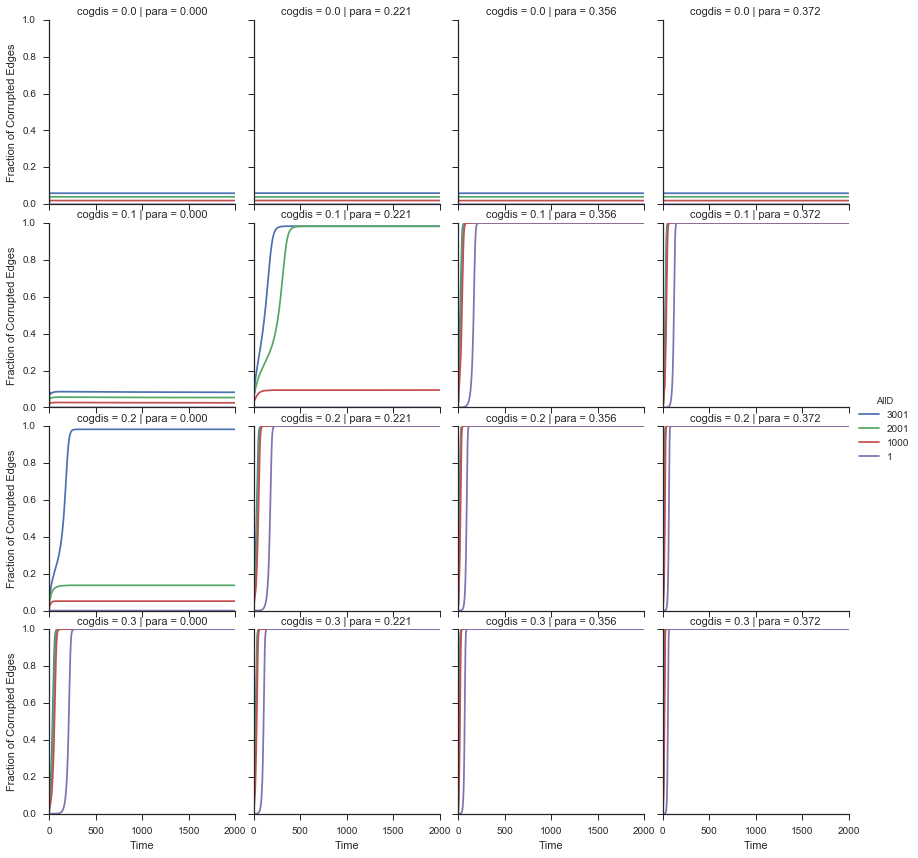

In [4]:
df2 = df[(df['AllD'].isin([1, 1000, 2001, 3001])) & (df['Cognitive Dissonance']<=0.3)]
g = sns.FacetGrid(df2, col='Paranoia', row='Cognitive Dissonance', hue='AllD',
                  row_order=sorted(df2['Cognitive Dissonance'].unique()),
                  col_order=sorted(df2['Paranoia'].unique()), despine=True)
g.map(plt.plot, 'Time', 'Fraction of Corrupted Edges')
g.add_legend()
g.fig.subplots_adjust(wspace=.1, hspace=.1)
g.set_titles("cogdis = {row_name} | para = {col_name:.3f}")
plt.show()

## Detail: Prior (9, 3) paranoia=0.221

Dependiendo del nivel de Cognitive Dissonace toda la sociedad se infecta con un solo alld o nadie.

In [49]:
df3 = df[(df['AllD']==1) & (df['Cognitive Dissonance']<=0.3) & (df['Cognitive Dissonance']>0) & (df['Prior']=='[9 3]')]
df3 = df3.sort_values('Cognitive Dissonance')
fig = plt.figure(figsize=[linewidthin, linewidthin/1.6])
ax = sns.tsplot(df3, time='Time', condition='Cognitive Dissonance', value='Fraction of Corrupted Edges',
                unit='seed')
ax.set_xlim([0, 220])
ax.set_ylim([-0.1, 1.1])
sns.despine()
fig.subplots_adjust(left=0.15, bottom=0.25)
plt.savefig('figures/percolation_evolution.pdf')
plt.show()

## Last State Facet Grid: Cognitive Dissonace x Paranoia

In [6]:
dfend = df[(df['Time']==max(df['Time'])) & (df['Cognitive Dissonance']<=0.3)]
g = sns.FacetGrid(dfend, col='Paranoia', row='Cognitive Dissonance',
                  row_order=sorted(dfend['Cognitive Dissonance'].unique()),
                  col_order=sorted(dfend['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1), despine=True)
g.map(plt.scatter, 'Fraction of AllD', 'Fraction of Corrupted Edges')
g.fig.subplots_adjust(wspace=.15, hspace=.15)
g.set_titles("cogdis = {row_name} | para = {col_name:.3f}")
g.set
plt.show()

## Evolution: Detail Cognitive Dissonance

In [7]:
df = pd.DataFrame(pickle.load(open('data/percolation_cogdis.pkl', 'rb')))

p = 0.00004
number_of_nodes = 100000
seed = 1
G = G = nx.read_gpickle('erdos_p_{}_nodes_{}_seed_{}.gpkl'.format(p, number_of_nodes, seed))
number_of_nodes = G.number_of_nodes()
df['Fraction of AllD'] = df['AllD'] / number_of_nodes

display(df[df['Cognitive Dissonance']==0.3].tail())
display(df.describe())

AllD  Cognitive Dissonance  Cooperations  Defections  \
1995  10000                   0.3      0.001195    0.998805   
1996  10000                   0.3      0.001195    0.998805   
1997  10000                   0.3      0.001195    0.998805   
1998  10000                   0.3      0.001195    0.998805   
1999  10000                   0.3      0.001195    0.998805   

      Fraction of Corrupted Edges  Paranoia  Prior  Time  seed  \
1995                            1         0  [8 4]  1995     1   
1996                            1         0  [8 4]  1996     1   
1997                            1         0  [8 4]  1997     1   
1998                            1         0  [8 4]  1998     1   
1999                            1         0  [8 4]  1999     1   

      Fraction of AllD  
1995          0.102078  
1996          0.102078  
1997          0.102078  
1998          0.102078  
1999          0.102078

AllD  Cognitive Dissonance   Cooperations     Defections  \
count  602000         602000.000000  602000.000000  602000.000000   
mean    10000              0.150000       0.344139       0.655861   
std         0              0.086891       0.373967       0.373967   
min     10000              0.000000       0.001077       0.100831   
25%     10000              0.075000       0.016264       0.218605   
50%     10000              0.150000       0.018957       0.981043   
75%     10000              0.225000       0.781395       0.983736   
max     10000              0.300000       0.899169       0.998923   

       Fraction of Corrupted Edges  Paranoia           Time    seed  \
count                602000.000000    602000  602000.000000  602000   
mean                      0.665763         0     999.500000       1   
std                       0.366938         0     577.350677       0   
min                       0.100831         0       0.000000       1   
25%                       0.236126         0     499.750000       1   
50%                       0.985626         0     999.500000       1   
75%                       0.986283         0    1499.250000       1   
max                       1.000000         0    1999.000000       1   

       Fraction of AllD  
count      6.020000e+05  
mean       1.020783e-01  
std        6.207817e-13  
min        1.020783e-01  
25%        1.020783e-01  
50%        1.020783e-01  
75%        1.020783e-01  
max        1.020783e-01

In [8]:
cog_dis_list = [0, 0.001, 0.002, 0.003, 0.084, 0.085, 0.086, 0.087, 0.126, 0.127, 0.128, 0.129]
g = sns.FacetGrid(df[df['Cognitive Dissonance'].isin(cog_dis_list)], col='Cognitive Dissonance',
                  col_wrap=4, col_order=cog_dis_list, despine=True)
g.map(plt.plot, 'Time', 'Fraction of Corrupted Edges')
plt.show()

In [9]:
dfend = df[df['Time']==max(df['Time'])]
dfend.plot('Cognitive Dissonance', 'Fraction of Corrupted Edges', kind='scatter')
sns.despine()
plt.show()